# Phone Plan Data Analysis

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization and Loading Data

In [54]:
# loading all the libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np

In [55]:
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')

## `plans` Dataframe

In [56]:
plans # all data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The `plans` dataframe shows data on the Surf and Ultimate plans.

According to the documentation:
- `'messages_included'` — monthly text allowance
- `'mb_per_month_included'` — data volume allowance (in megabytes)
- `'minutes_included '` — monthly minute allowance
- `'usd_monthly_pay '` — monthly charge in US dollars
- `'usd_per_gb'` — price per extra gigabyte of data after exceeding the package limits
- `'usd_per_message'` — price per minute after exceeding the package limits
- `'usd_per_minute'` — price per text after exceeding the package limits
- `'plan_name'` — calling plan name

In [57]:
plans.info() # general/summary information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


Since the plan data only includes two observations: Surf and Ultimate, it is easy to identify any issues. As shown above, the two rows are not duplicates of each other, there are no missing data, and the general summary includes appropriate data types for each variable. Therefore, the data is ready to use since there is no need to fix anything.

## `users` Dataframe

In [58]:
users.head() # sample of data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


The `users` dataframe shows data on the users.

According to the documentation:
- `'user_id'` — unique user identifier
- `'first_name'` — user's name
- `'last_name'` — user's last name
- `'age'` — user's age (years)
- `'city'` — user's city of residence
- `'reg_date'` — subscription date (dd, mm, yy)
- `'plan'` — calling plan name
- `'churn_date'` — the date the user stopped using the service

In [59]:
users.info()  # general/summary information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [60]:
# change `reg_date` and `churn_date` type to datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

In [61]:
users.duplicated().sum() # checking for duplicates

0

In [62]:
users.isna().sum() # checking for missing values

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [63]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


As shown above, there are no duplicated rows and missing values. Although, there are missing values for the `churn_date` variable, it is acceptable to leave it as is, since that means the user is still using the phone plan.  For the general summary, the table includes appropriate data types, except for the date variables, which are shown to be objects. After fixing the issue, the data is now ready to use.

## `calls` Dataframe

In [64]:
calls.head() # sample of data

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


The `calls` dataframe shows data on the calls.

According to the documentation:
- `'id'` — unique call identifier
- `'user_id'` — the identifier of the user making the call
- `'call_date '` — call date
- `'duration '` — call duration (in minutes)

In [65]:
calls.info() # general/summary information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [66]:
calls.duplicated().sum() # checking for duplicates

0

In [67]:
calls.isna().sum() # checking for missing values

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [68]:
# change `call_date` type to datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

In [69]:
# round the duration
calls['duration'] = np.ceil(calls['duration'])

In [70]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


As shown above, there are no duplicated rows and missing values. The general summary includes appropriate data types for each variable, except for the `call_date`, which is presented as an object type. After fixing the issue by changing it to datetime, the data is now ready to use.

## `messages` Dataframe

In [71]:
messages.head() # sample of data

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


The `messages` dataframe shows data on the texts. 

According to the documentation:
- `'id'` — unique text message identifier
- `'user_id'` — the identifier of the user sending the text
- `'message_date'` — text message date

In [72]:
messages.info()  # general/summary information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [73]:
# change `message_date` type to datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

In [74]:
messages.duplicated().sum() # checking for duplicates

0

In [75]:
messages.isna().sum() # checking for missing values

id              0
user_id         0
message_date    0
dtype: int64

In [76]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


As shown above, there are no duplicated rows and missing values. The general summary includes appropriate data types for each variable, except for the `message_date`, which is presented as an object type. After fixing the issue by changing it to datetime, the data is now ready to use.

## `internet` Dataframe

In [77]:
internet.head() # sample of data

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


The `internet` dataframe shows data on web sessions.

According to the documentation:
- `'id'` — unique session identifier
- `'user_id'` — user identifier
- `'session_date '` — web session date
- `'mb_used'` — the volume of data spent during the session (in megabytes)

In [78]:
internet.info() # general/summary information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [79]:
internet.duplicated().sum() # checking for duplicates

0

In [80]:
internet.isna().sum() # checking for missing values

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [81]:
# change `session_date` type to datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

In [82]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


As shown above, there are no duplicated rows, no missing values, and the general summary includes appropriate data types for each variable, except for the `message_date`, which is presented as an object type. After fixing the issue by changing it to datetime, the data is now ready to use.

## Aggregate Data Per User

Now that the data is clean, I will first aggregate data per user per period from each dataset in order to have just one record per user per period. Then, I will merge all dataframes to show what an unique user consumed in a given month, before adding the monthly revenue for each observation. The final dataframe shown below will help with the analysis.

In [83]:
# number of calls made by each user per month
calls['month'] = calls['call_date'].dt.month
calls_per_month = calls.groupby(['user_id', 'month'])['id'].count().reset_index()
calls_per_month = calls_per_month.rename(columns={'id':'num_of_calls'})

In [84]:
# amount of minutes spent by each user per month
mins_per_user = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()

In [85]:
# number of messages sent by each user per month
messages['month'] = messages['message_date'].dt.month
messages_per_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_per_month = messages_per_month.rename(columns={'id':'num_of_messages'})

In [86]:
# volume of internet traffic used by each user per month
internet['month'] = internet['session_date'].dt.month
gb_per_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

In [87]:
# merging data for calls, minutes, messages, internet based on user_id and month
final = calls_per_month.merge(messages_per_month, on=['user_id', 'month'], how='outer')
final = final.merge(gb_per_month, on=['user_id', 'month'], how='outer')
final = final.merge(mins_per_user, on=['user_id', 'month'], how='outer')
final = final.merge(users, on='user_id', how='inner')
final = final.drop(columns=['first_name', 'last_name', 'churn_date', 'reg_date', 'age'])
final.fillna({'duration': 0, 'num_of_messages': 0, 'mb_used': 0}, inplace=True)

In [88]:
# add the monthly revenue for each user
def monthly_rev(x):
    messages = 0
    gb = 0
    calls = 0
    if x['plan'] == 'surf':
        if x['num_of_messages'] > 50:
            messages += (x['num_of_messages'] - 50) * 0.03
        if x['mb_used'] > 15360:
            gb += np.ceil((x['mb_used'] - 15360) / 1024) * 10
        if x['duration'] > 500:
            calls += (x['duration'] - 500) * 0.03
        return messages + gb + calls + 20
    elif x['plan'] == 'ultimate':
        if x['num_of_messages'] > 1000:
            messages += (x['num_of_messages'] - 1000) * 0.01
        if x['mb_used'] > 30720:
            gb += np.ceil((x['mb_used'] - 30720) / 1024) * 7
        if x['duration'] > 500:
            calls += (x['duration'] - 3000) * 0.01
        return messages + gb + calls + 70

final['monthly_rev'] = final.apply(monthly_rev,axis=1)
final.head()

,user_id,month,num_of_calls,num_of_messages,mb_used,duration,city,plan,monthly_rev
0,1000,12,16.0,11.0,1901.47,124.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,70.00
1,1001,8,27.0,30.0,6919.15,182.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
2,1001,9,49.0,44.0,13314.82,315.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,20.00
3,1001,10,65.0,53.0,22330.49,393.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,90.09
4,1001,11,64.0,36.0,18504.30,426.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00


## Studying User Behaviour

In this section, I will calculate key descriptive statistics using the aggregated data to provide a comprehensive overview of the profitability of each plan. The analysis will focus on the usage patterns related to calls, messages, internet and revenue, offering insights into which plan performs better in these specific areas.

### Calls

<AxesSubplot:title={'center':'Average Duration of Calls per Month for Surf and Ultimate Plans'}, xlabel='Month of the Year', ylabel='Average Duration of Calls by Minute'>

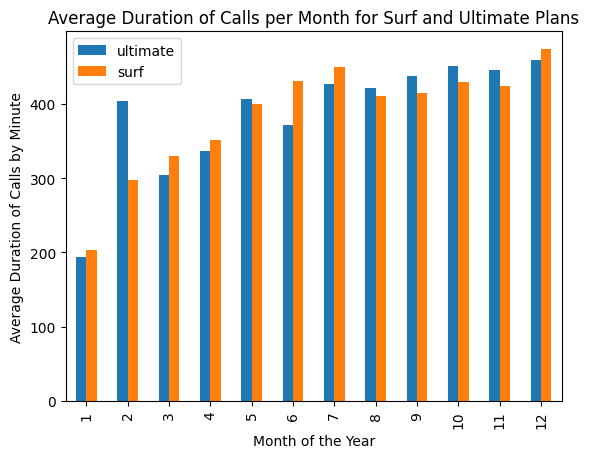

In [89]:
# comparing average duration of calls per each plan per each distinct month
ult_duration = final[final['plan'] == 'ultimate'].groupby('month')['duration'].mean().reset_index()
surf_duration = final[final['plan'] == 'surf'].groupby('month')['duration'].mean().reset_index()
avg_duration = ult_duration.merge(surf_duration, on='month', how='left')
avg_duration = avg_duration.rename(columns={'duration_x':'ultimate', 'duration_y':'surf'})
avg_duration.plot(x='month', y=['ultimate', 'surf'], 
                  xlabel='Month of the Year', ylabel='Average Duration of Calls by Minute',
                 kind='bar', title='Average Duration of Calls per Month for Surf and Ultimate Plans')

In this bar graph, it is evident that the average duration of calls per month for the Surf and Ultimate plans are very similar. Except for the the large difference between the two plans in month 2, both show a general increase in calls every month.

Text(0, 0.5, 'Frequency of Range')

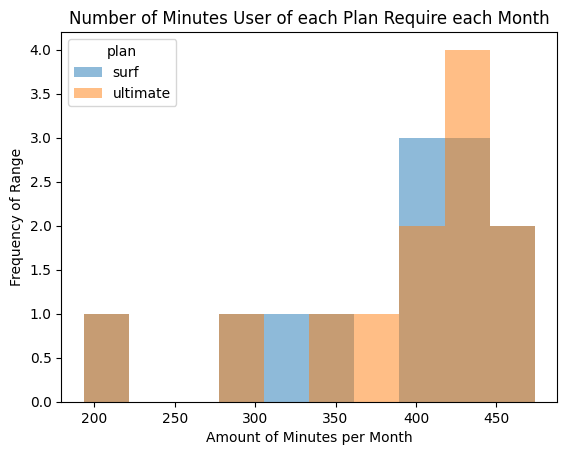

In [90]:
# comparing the number of minutes users of each plan require each month
mins = final.pivot_table(index='plan', columns='month', values='duration', aggfunc='mean').T
mins.plot(kind='hist', alpha=0.5)
plt.title('Number of Minutes User of each Plan Require each Month')
plt.xlabel('Amount of Minutes per Month')
plt.ylabel('Frequency of Range')

This histogram displays the distribution of the average monthly call minutes for each plan, highlighting the frequency of usage. Notably, both plans exhibit a similar frequency throughout the graph, especially at the 400-minute mark per month, suggesting comparable usage patterns at this level.

In [91]:
# finding mean and the variance of the monthly call duration
surf_avg = final[final['plan'] == 'surf']['duration'].mean()
ult_avg = final[final['plan'] == 'ultimate']['duration'].mean()
surf_var = final[final['plan'] == 'surf']['duration'].var()
ult_var = final[final['plan'] == 'ultimate']['duration'].var()
print("Surf average:", f'{surf_avg:.2f}')
print("Ultimate average:", f'{ult_avg:.2f}')
print("Surf variance:", f'{surf_var:.2f}')
print("Ultimate variance:", f'{ult_var:.2f}')

Surf average: 428.75
Ultimate average: 430.45
Surf variance: 54968.28
Ultimate variance: 57844.46


The calculations above illustrate the calculated mean and variance of the call duration for each plan on a monthly basis. While the values for each plan within their respective months appear similar, the overall mean and variance for both plans differ significantly. This large variation suggests a wide spread in the data, which may complicate the interpretation of results.

<AxesSubplot:title={'center':'Boxplot of Messages Sent Between Two Plans'}>

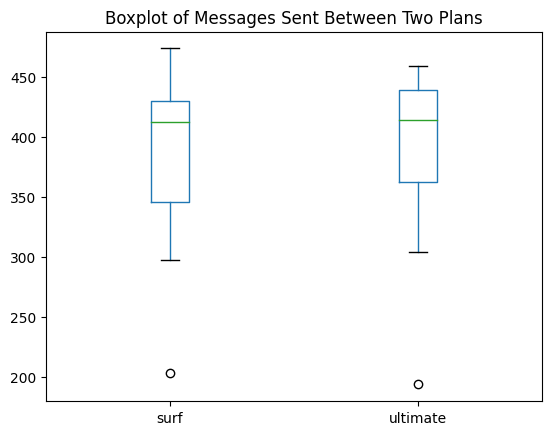

In [92]:
# plotting boxplot to visualize the distribution of the monthly call duration
mins.plot(kind='box', xlabel='Plans', title='Boxplot of Messages Sent Between Two Plans')

As concluded by the previous bar graph, histogram, and pivot table, this box plot further solidifies that the users' calling behavior between the two plans are very similar. To be specific, both box plots have a negative skew, meaning that the median is closer to the higher end of the range of values and more outliers are on the lower range of values. 

### Messages

<AxesSubplot:title={'center':'Average Number of Messages per Month for Surf and Ultimate Plans'}, xlabel='Month of the Year', ylabel='Number of Messages'>

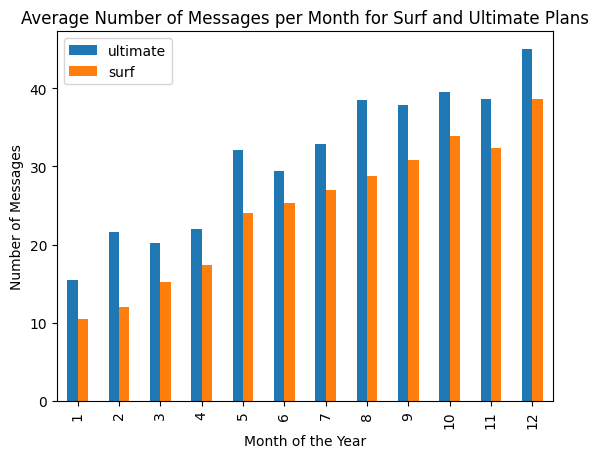

In [93]:
# comparing the number of messages users of each plan tend to send each month
ult_messages = final[final['plan'] == 'ultimate'].groupby('month')['num_of_messages'].mean().reset_index()
surf_messages = final[final['plan'] == 'surf'].groupby('month')['num_of_messages'].mean().reset_index()
both_messages = ult_messages.merge(surf_messages, on='month', how='left') 
both_messages = both_messages.rename(columns={'num_of_messages_x':'ultimate', 'num_of_messages_y':'surf'})
both_messages.plot(x='month', y=['ultimate', 'surf'], 
                   xlabel='Month of the Year', ylabel='Number of Messages',
                   kind='bar', title='Average Number of Messages per Month for Surf and Ultimate Plans')

In this bar graph, it is evident that the Ultimate plan has a larger average amount of messages sent per month than the Surf plan, and both show a general linear increase as time goes on.

Text(0, 0.5, 'Frequency of Range')

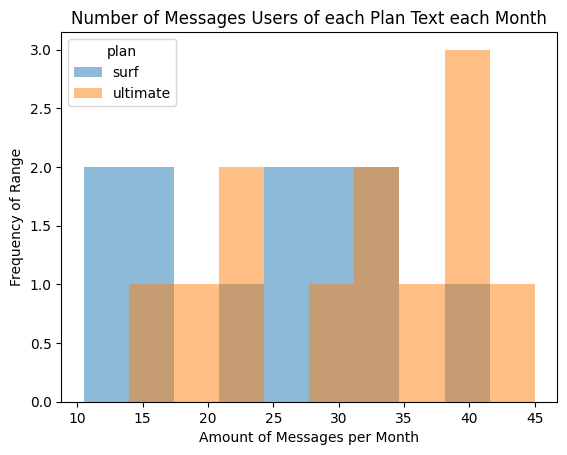

In [94]:
# comparing the number of messages users of each plan require each month
messages = final.pivot_table(index='plan', columns='month', values='num_of_messages', aggfunc='mean').T
messages.plot(kind='hist', alpha=0.5)
plt.title('Number of Messages Users of each Plan Text each Month')
plt.xlabel('Amount of Messages per Month')
plt.ylabel('Frequency of Range')

This histogram displays the distribution of the average monthly messages sent for each plan, highlighting the frequency of usage. Notably, the Ultimate plan has a genearl higher frequency of messages than the Ultimate plan does, as shown by the spike at the 40-message mark. This is understandable because the Ultimate plan has a cheaper price per message and a larger amount of messages included before the user gets charged.

In [95]:
# finding mean and the variance of the monthly messages sent
surf_avg = final[final['plan'] == 'surf']['num_of_messages'].mean()
ult_avg = final[final['plan'] == 'ultimate']['num_of_messages'].mean()
surf_var = final[final['plan'] == 'surf']['num_of_messages'].var()
ult_var = final[final['plan'] == 'ultimate']['num_of_messages'].var()
print("Surf average:", f'{surf_avg:.2f}')
print("Ultimate average:", f'{ult_avg:.2f}')
print("Surf variance:", f'{surf_var:.2f}')
print("Ultimate variance:", f'{ult_var:.2f}')

Surf average: 31.16
Ultimate average: 37.55
Surf variance: 1126.72
Ultimate variance: 1208.76


The calculations above illustrate the calculated mean and variance of the messages sent for each plan on a monthly basis. One can see that the Ultimate average is higher than the Surf average. In addition, the overall mean and variance for both plans differ significantly. This large variation suggests a wide spread in the data, which may complicate the interpretation of results.

<AxesSubplot:title={'center':'Boxplot of Messages Sent Between Two Plans'}>

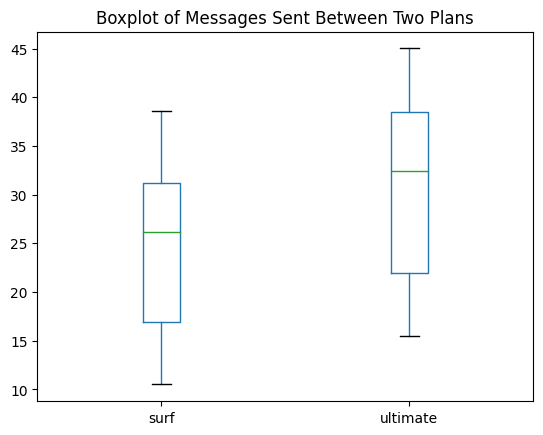

In [96]:
# plotting boxplot to visualize the distribution of the messages sent
messages.plot(kind='box', xlabel='Plans', title='Boxplot of Messages Sent Between Two Plans')

As concluded by the previous bar graph and histograph, this box plot further solidifies that the users' messaging behavior in the Ultimate plan is more frequent than the Surf plan. Here, the median and the range of values for the Ultimate plan is larger than the Surf plan.

### Internet

<AxesSubplot:title={'center':'Average Amount of Internet Traffic per Month for Surf and Ultimate Plans'}, xlabel='Month of the Year', ylabel='Amount of MB'>

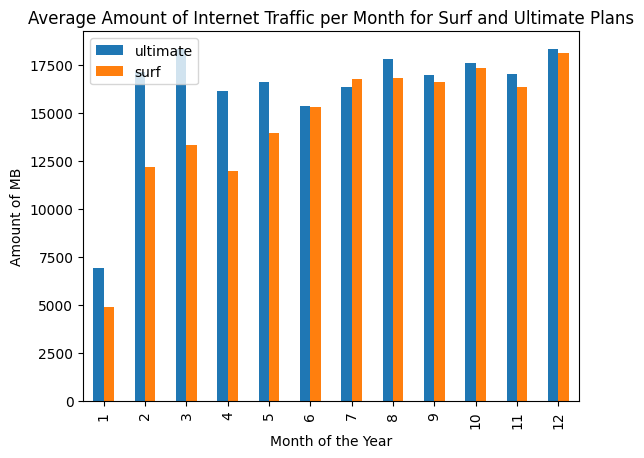

In [97]:
# comparing the amount of internet traffic consumed by users per plan
ult_mb = final[final['plan'] == 'ultimate'].groupby('month')['mb_used'].mean().reset_index()
surf_mb = final[final['plan'] == 'surf'].groupby('month')['mb_used'].mean().reset_index()
both_mb = ult_mb.merge(surf_mb, on='month', how='left') 
both_mb = both_mb.rename(columns={'mb_used_x':'ultimate', 'mb_used_y':'surf'})
both_mb.plot(x='month', y=['ultimate', 'surf'], 
             xlabel='Month of the Year', ylabel='Amount of MB', kind='bar', 
             title='Average Amount of Internet Traffic per Month for Surf and Ultimate Plans')

In this bar graph, it is evident that the Ultimate plan has a larger average amount of messages sent per month than the Surf plan. There is also a large spike for the Ultimate plan in months 2 and 3, but otherwise, both plans show a general increase as time goes on.

Text(0, 0.5, 'Frequency of Range')

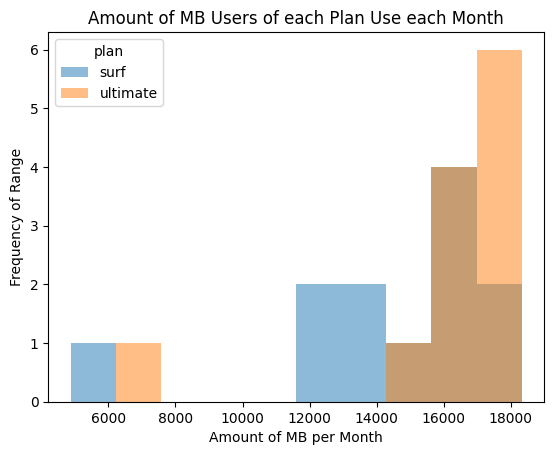

In [98]:
# comparing the amount of MB users of each plan require each month
mb = final.pivot_table(index='plan', columns='month', values='mb_used', aggfunc='mean').T
mb.plot(kind='hist', alpha=0.5)
plt.title('Amount of MB Users of each Plan Use each Month')
plt.xlabel('Amount of MB per Month')
plt.ylabel('Frequency of Range')

This histogram displays the distribution of the average monthly call minutes for each plan, highlighting the frequency of usage. Notably, both plans exhibit a similar frequency in the beginning of the graph. However, at 16000-180000 MB, the Ultimate plan has a greater significant frequency than the Surf plan. This is once again understandable because the Ultimate plan has a cheaper price per GB and a larger amount of MB included before the user gets charged. 

In [99]:
# finding mean and the variance of the MB usage
surf_avg = final[final['plan'] == 'surf']['mb_used'].mean()
ult_avg = final[final['plan'] == 'ultimate']['mb_used'].mean()
surf_var = final[final['plan'] == 'surf']['mb_used'].var()
ult_var = final[final['plan'] == 'ultimate']['mb_used'].var()
print("Surf average:", f'{surf_avg:.2f}')
print("Ultimate average:", f'{ult_avg:.2f}')
print("Surf variance:", f'{surf_var:.2f}')
print("Ultimate variance:", f'{ult_var:.2f}')

Surf average: 16558.28
Ultimate average: 17214.70
Surf variance: 64216395.84
Ultimate variance: 61652293.32


The calculations above illustrate the calculated mean and variance of the messages sent for each plan on a monthly basis. One can see that the Ultimate average is higher than the Surf average by 1000. In addition, the overall mean and variance for both plans differ significantly. This large variation suggests a wide spread in the data, which may complicate the interpretation of results.

<AxesSubplot:title={'center':'Boxplot of Messages Sent Between Two Plans'}>

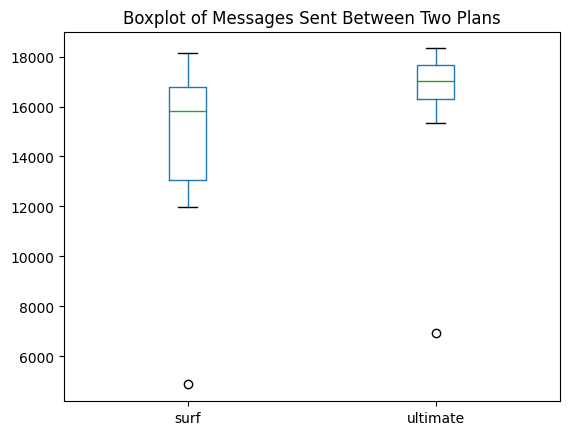

In [100]:
# plotting boxplot to visualize the distribution of the MB used
mb.plot(kind='box', xlabel='Plans', title='Boxplot of Messages Sent Between Two Plans')

As concluded by the previous bar graph and histograph, this box plot further solidifies that the users use more MB in the Ultimate plan than they do in the Surf plan. While both box plots have a negative skew, the median and the outliers for the Ultimate plan is larger than the Surf plan. In addition, the minimum and maximum ranges of the Ultimate box plot is significantly less than the Surf's.

### Revenue

<AxesSubplot:title={'center':'Average Monthly Revenue for Surf and Ultimate Plans'}, xlabel='Month of the Year', ylabel='Amount of MB'>

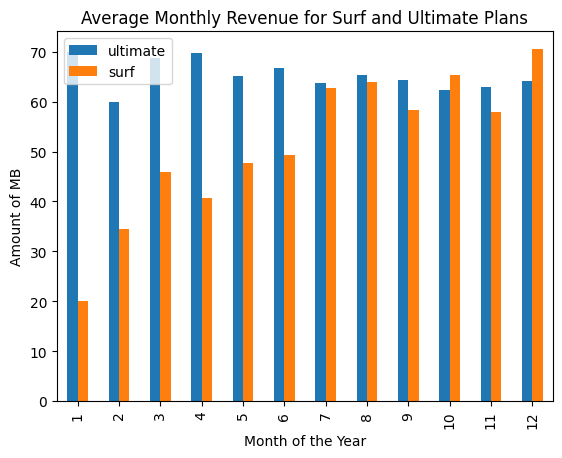

In [101]:
# comparing the average amount of monthly revenue per plan
ult_rev = final[final['plan'] == 'ultimate'].groupby('month')['monthly_rev'].mean().reset_index()
surf_rev = final[final['plan'] == 'surf'].groupby('month')['monthly_rev'].mean().reset_index()
both_rev = ult_rev.merge(surf_rev, on='month', how='left') 
both_rev = both_rev.rename(columns={'monthly_rev_x':'ultimate', 'monthly_rev_y':'surf'})
both_rev.plot(x='month', y=['ultimate', 'surf'], 
             xlabel='Month of the Year', ylabel='Amount of MB',
             kind='bar', title='Average Monthly Revenue for Surf and Ultimate Plans')

In this bar graph, it is evident that the Ultimate plan has a consistent amount of revenue throughout the year, while Surf has a general increase over time. In addition, there is a significant difference between the Ultimate and Surf revenue in the first few months, which gets less towards the later months.

Text(0, 0.5, 'Frequency of Range')

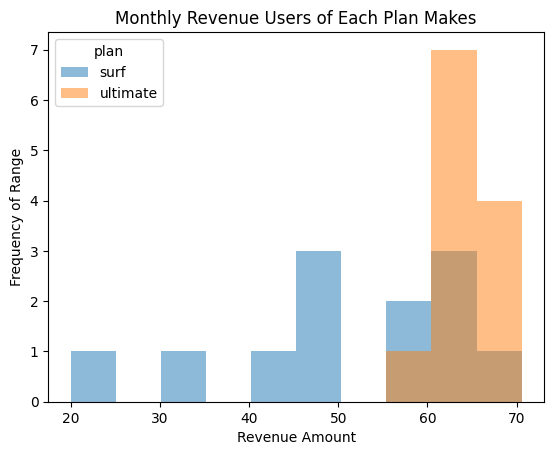

In [102]:
# comparing the monthly revenue of each plan
rev = final.pivot_table(index='plan', columns='month', values='monthly_rev', aggfunc='mean').T
rev.plot(kind='hist', alpha=0.5)
plt.title('Monthly Revenue Users of Each Plan Makes')
plt.xlabel('Revenue Amount')
plt.ylabel('Frequency of Range')

This histogram displays the distribution of the average monthly revenue users create for each plan, highlighting the frequency of usage. Notably, the Ultimate plan bar is only present in the 60-70 range with a high frequency of 6, while the Surf plan is significantly less in the revenue and frequency amount. This is once again understandable since Ultimate's monthly pay is 50 dollars more than Surf's.

In [103]:
# finding mean and the variance of monthly user revenue
surf_avg = final[final['plan'] == 'surf']['monthly_rev'].mean()
ult_avg = final[final['plan'] == 'ultimate']['monthly_rev'].mean()
surf_var = final[final['plan'] == 'surf']['monthly_rev'].var()
ult_var = final[final['plan'] == 'ultimate']['monthly_rev'].var()
print("Surf average:", f'{surf_avg:.2f}')
print("Ultimate average:", f'{ult_avg:.2f}')
print("Surf variance:", f'{surf_var:.2f}')
print("Ultimate variance:", f'{ult_var:.2f}')

Surf average: 60.71
Ultimate average: 64.20
Surf variance: 3067.84
Ultimate variance: 259.79


The calculations above illustrate the calculated mean and variance of revenue for each plan on a monthly basis. One can see that the Ultimate average is higher than the Surf average. In addition, the overall mean and variance for both plans differ significantly. This large variation suggests a wide spread in the data, which may complicate the interpretation of results.

<AxesSubplot:title={'center':'Boxplot of Monthly Revenue Between Two Plans'}>

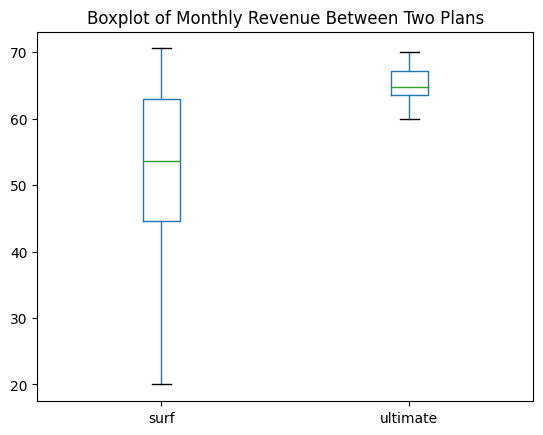

In [104]:
# plotting boxplot to visualize the distribution of the revenue
rev.plot(kind='box', xlabel='Plans', title='Boxplot of Monthly Revenue Between Two Plans')

As concluded by the previous bar graph and histograph, this box plot further solidifies that the users produce more monthly revenue in the Ultimate plan than they do in the Surf plan. The median is larger and the range is a significantly less in the Ultimate plan than it is in the Surf plan.

## Test Statistical Hypotheses

In this section, I will conduct a hypothesis test to evaluate whether there is a statistically significant difference between two key variables in the dataset. Specifically, I will compare the average revenue generated by users of the Ultimate and Surf calling plans.

Null Hypothesis (H₀): There is no significant difference in the average revenue between the Ultimate and Surf plan users.

Alternative Hypothesis (H₁): There is a significant difference in the average revenue between the two plans.

To test this, I will use a two-tailed test with a significance level (alpha) of 0.05. This approach will allow me to determine whether the observed difference in average revenue is statistically significant or due to random variation. The results will provide insights into whether one plan generates significantly more revenue than the other.

In [105]:
# test the hypotheses, two tailed test
ultimate_rev=final[final['plan'] == 'ultimate']['monthly_rev']
surf_rev = final[final['plan']=='surf']['monthly_rev']
results = st.ttest_ind(ultimate_rev, surf_rev, equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < 0.05):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value:  0.021476633863765613
We reject the null hypothesis


As shown by the p-value, it is considerably less than 0.05, meaning that null hypothesis is rejected. Therefore, there is a significant difference between the two plan revenues.

Now, I will compare the average revenue in the NY-NJ area and other regions between the Ultimate and Surf plan users, using a two-tailed test with similar null and alternative hypotheses used in the last example and the same alpha of 0.05.

In [106]:
# test the hypotheses, two tailed test
nynj = final[final['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_rev']
other = final[final['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_rev']
results = st.ttest_ind(nynj, other, equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < 0.05):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value:  0.10748595044892847
We can't reject the null hypothesis


As shown by the p-value, it is considerably less than 0.05, meaning that null hypothesis is rejected. Therefore, there is a significant difference between the two plan revenues in the NY-NJ and other regions.

## Conclusion

The research done shows the user behavior between two different plans: Surf and Ultimate. After aggregating the datasets into one, I was able to find differences in monthly call duration, messages sent, MB used, and revenue. Looking at the data, I noticed that the Ultimate plan has more user behavior, which explains the higher revenue it earns than the Surf plan. Lastly, I did two two-tailed tests to determine a signifcant difference in the plans' revenue. This analysis will be useful for business leaders to know what makes a phone plan more profitable.